In [1]:
# Auxiliary Libraries
import numpy as np
import itertools

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Dataset
from sklearn.datasets import load_iris

# Import my own methods
from distances import distance, sort_distances
from plotting import scatter, heatmap, surface, plot_data_by_clusters_3d, scatter_to_surface
from clusters import grid, boxes, box_clusters, neighbors, similarity_index
from auxiliary import normalize, read, one_hot_encoding
from main import main
from mountain_clustering import MountainClustering
from subtractive_clustering import SubtractiveClustering
from kmeans_clustering import KMeansClustering

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

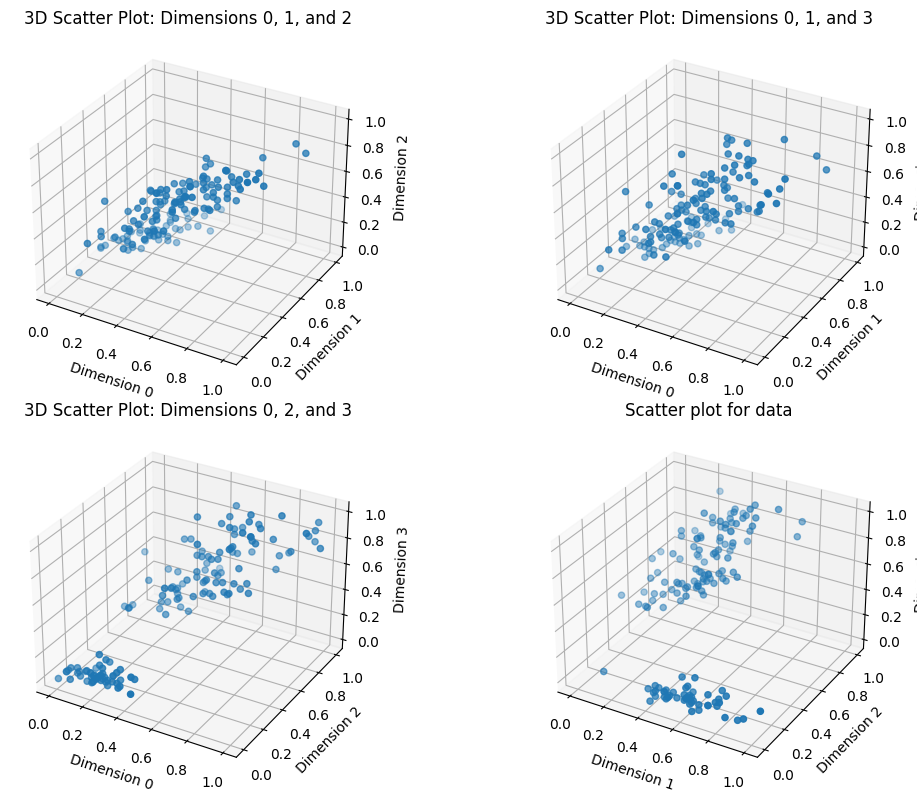

In [2]:
# Load the Iris dataset
iris = load_iris()

# Access attributes
data = iris.data  # The feature data (sepal length, sepal width, petal length, petal width)
norm_data = normalize(data)
target = iris.target  # The target labels (0 for Setosa, 1 for Versicolor, and 2 for Virginica)
target_names = iris.target_names  # The names of the target classes

# See the description of the dataset
description = iris.DESCR
print(description)

# Store datapoints by cluster
target_clusters = {}
for i in range(len(data)):
    target_i = target_names[target][i]

    if target_i not in target_clusters.keys():
        target_clusters[target_i] = []
    target_clusters[target_i].append(i)



# Plot the normalized data in the hypercube [0,1]x[0,1]x[0,1] for all sets of dimensions.
plotting = True
if plotting: scatter(norm_data)


K-Means


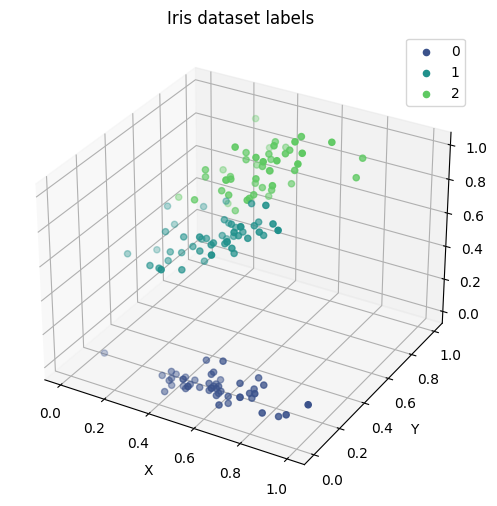

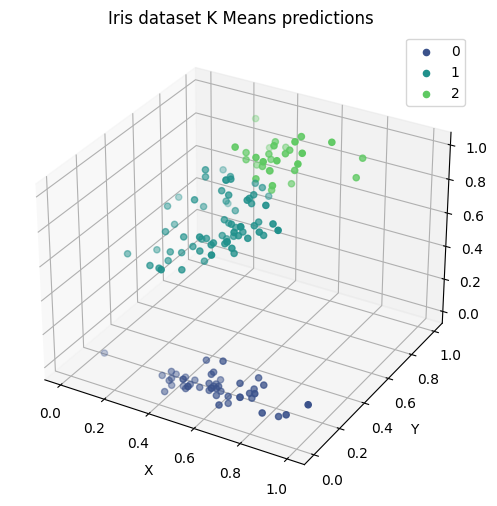

In [3]:
data = norm_data[:,1:4]

model = KMeansClustering(k = 3, centers = [28, 54, 143])
clusters = model.cluster(data)

plot_data_by_clusters_3d(data, target_clusters, title = "Iris dataset labels")
plot_data_by_clusters_3d(data, clusters, title = "Iris dataset K Means predictions")

Subtractive Clustering


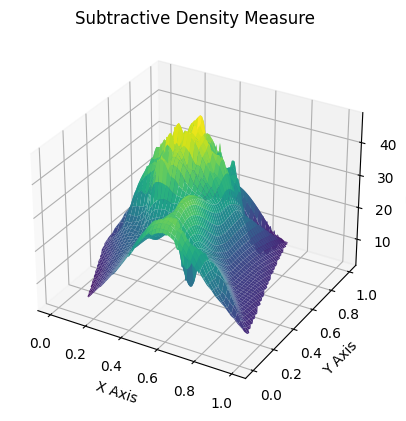

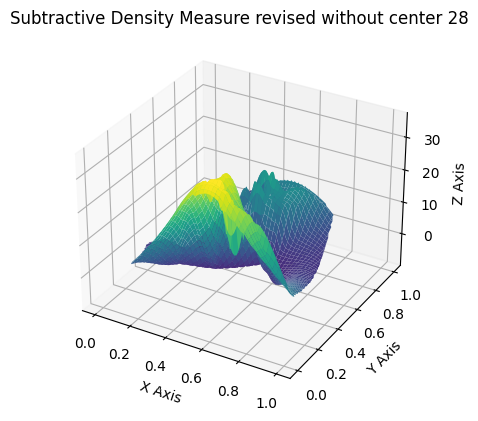

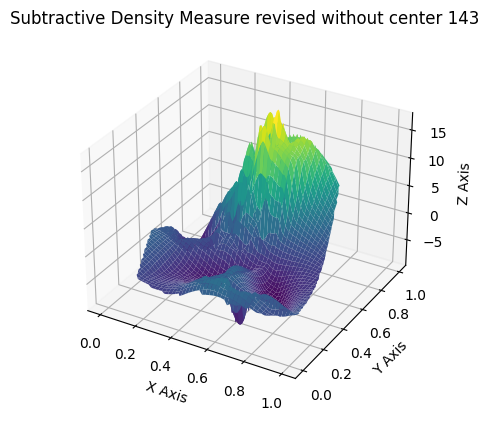

[54, 28, 143]


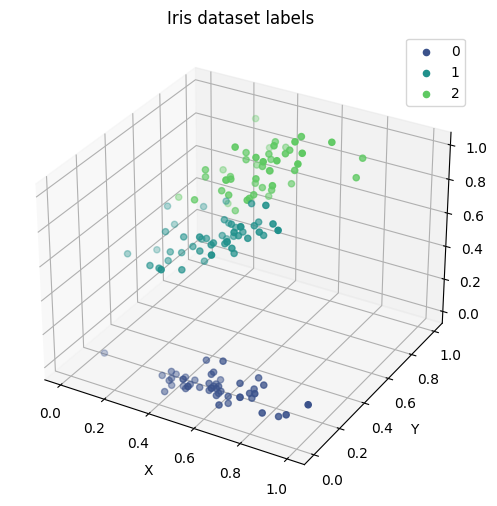

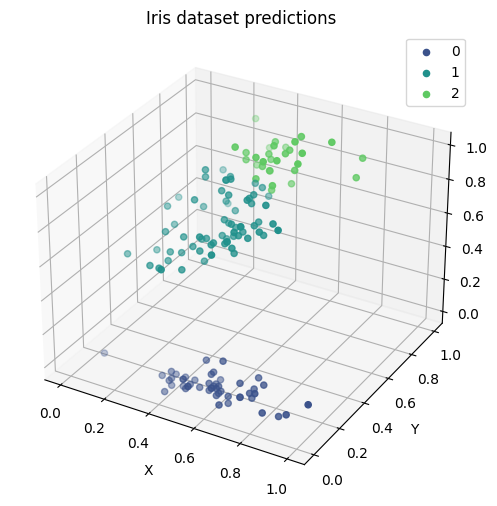

In [65]:

data = norm_data[:,1:4]

model = SubtractiveClustering(alpha_radius=0.5, max_iterations=100)
clusters = model.cluster(data)

plot_data_by_clusters_3d(data, target_clusters, title = "Iris dataset labels")
plot_data_by_clusters_3d(data, clusters, title = "Iris dataset predictions")

Mountain Clustering

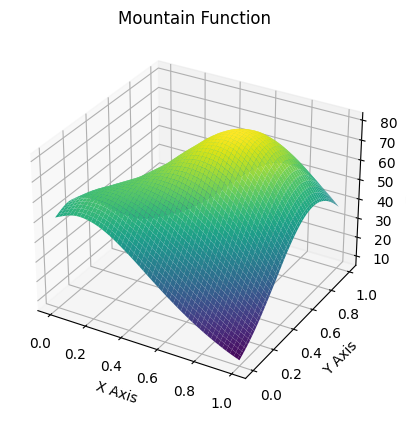

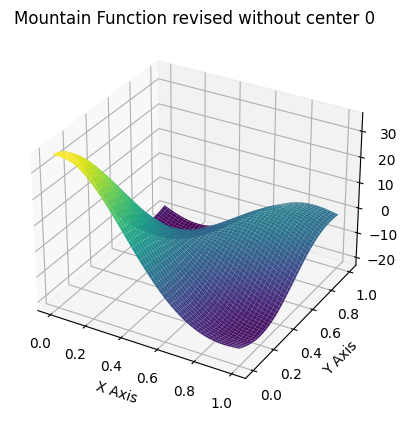

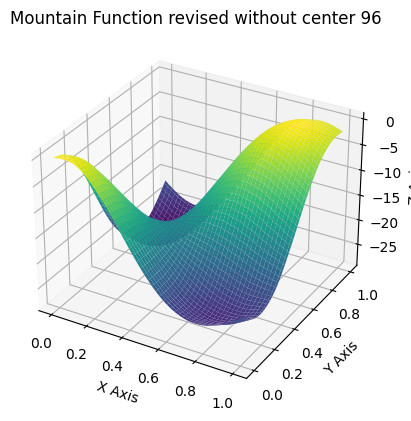

Cluster Center: 0, Data Points: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Cluster Center: 72, Data Points: [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 106, 119, 123, 126, 127, 133, 134, 138]
Cluster Center: 96, Data Points: [100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 124, 125, 128, 129, 130, 131, 132, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
58


{'setosa': (1.0, 0), 'versicolor': (1.0, 72), 'virginica': (0.84, 96)}

In [12]:
G = grid(dim = 2, size = 1/10)
data = norm_data[:,2:4]

model = MountainClustering(sigma=0.32, beta=0.464, max_iterations=100)
clusters = model.cluster(data, G)

for center, indices in clusters.items():
    print(f"Cluster Center: {center}, Data Points: {indices}")

# plot_data_by_clusters_3d(data, target_clusters, title = "Iris dataset labels")
# plot_data_by_clusters_3d(data, clusters, title = "Iris dataset predictions")
print(len(list(clusters.values())[1]))
similarity_index(clusters, target_clusters)



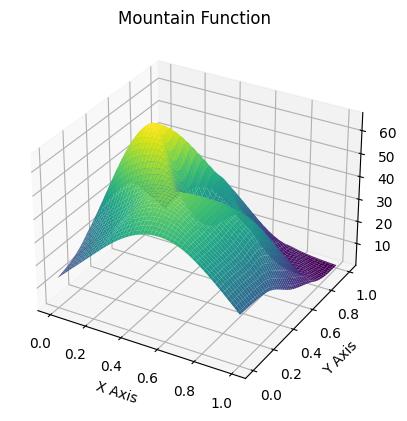

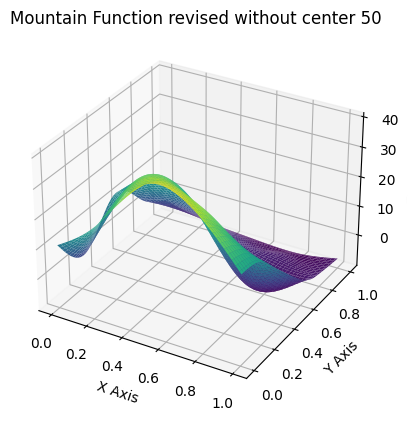

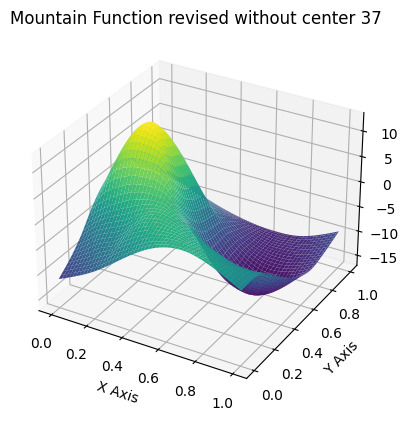

Cluster Center: 50, Data Points: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Cluster Center: 68, Data Points: [50, 51, 52, 56, 70, 77, 85, 86, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
Cluster Center: 37, Data Points: [53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 106, 119, 133, 134]


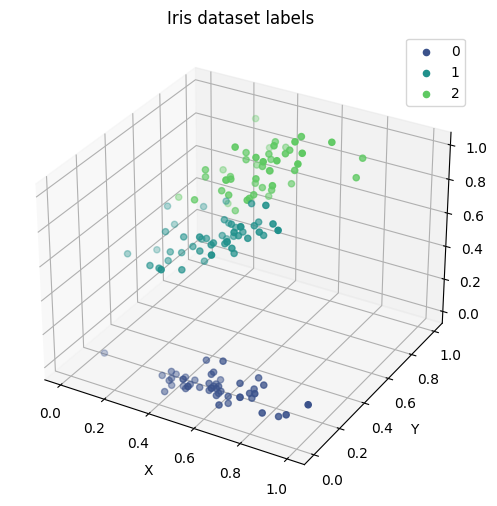

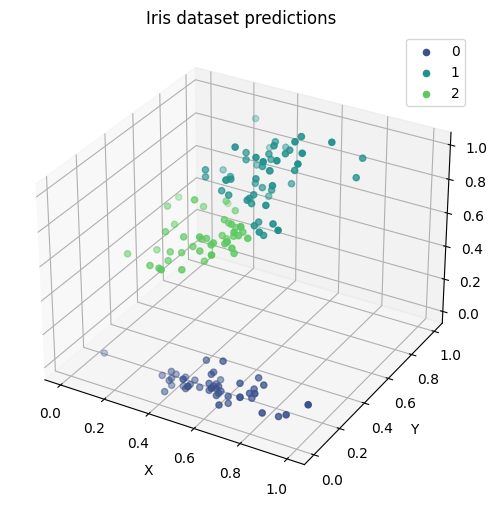

50

In [8]:
G = grid(dim = 3, size = 1/4)
data = norm_data[:,1:4]

model = MountainClustering(sigma=0.32, beta=0.464, max_iterations=100)
clusters = model.cluster(data, G)

for center, indices in clusters.items():
    print(f"Cluster Center: {center}, Data Points: {indices}")

plot_data_by_clusters_3d(data, target_clusters, title = "Iris dataset labels")
plot_data_by_clusters_3d(data, clusters, title = "Iris dataset predictions")

similarity_index(clusters, target_clusters)

len(list(clusters.values())[0])

Box Method

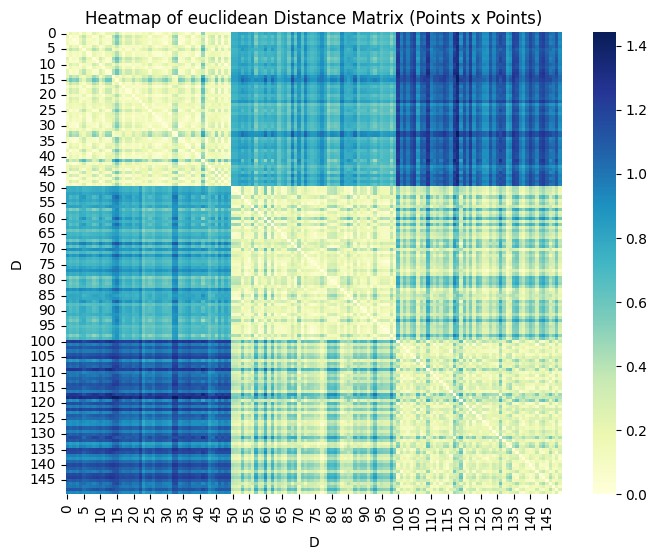

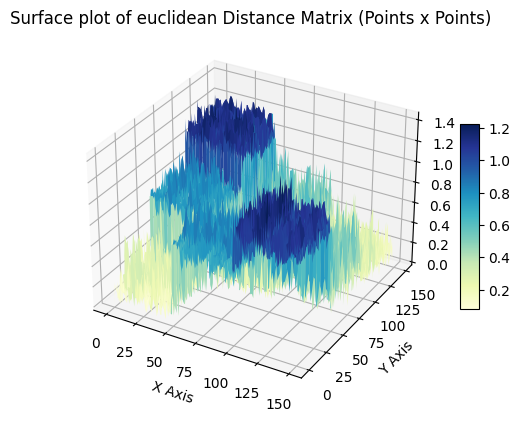

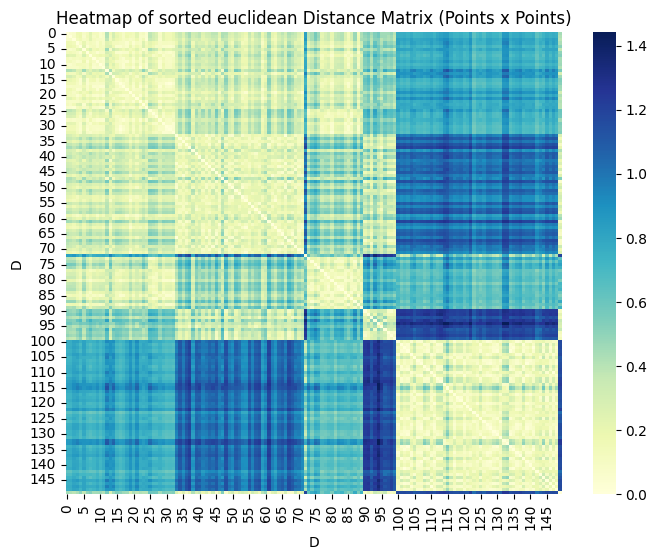

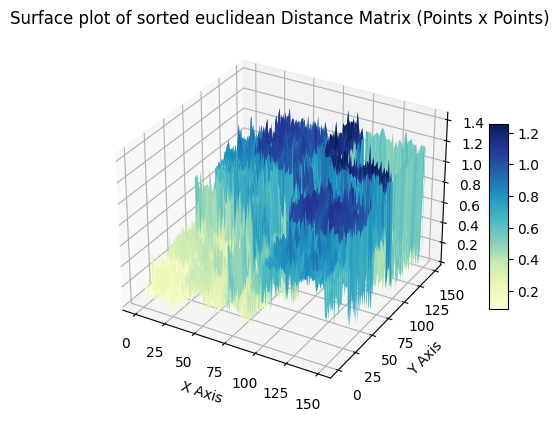

In [4]:
plotting = True
metric = 'euclidean'
clusters = 4
categorical = None
# If data contains categorical variables, use one-hot-encoding. Normalize data
if categorical != None:
    categorical_data = one_hot_encoding(data, categorical)
    norm_data = normalize(categorical_data)
else: norm_data = normalize(data)



# Calculate the distance matrix from all points to all points and plot the heatmap.
D = distance(norm_data, metric = metric)
if plotting: 
    heatmap(D, "Heatmap of "+metric+" Distance Matrix (Points x Points)") 
    surface(D, "Surface plot of "+metric+" Distance Matrix (Points x Points)")

# Sort the distance matrix using the boxes cluster criteria and plot the heatmap and surface map.
D, _, _ = sort_distances(distance(norm_data, metric = metric), div=clusters)
if plotting: 
    heatmap(D, "Heatmap of sorted "+metric+" Distance Matrix (Points x Points)")
    surface(D, "Surface plot of sorted "+metric+" Distance Matrix (Points x Points)")

vertices = grid(norm_data.shape[1], 1/2)

# Calculate the distance matrix from all vertices to all points and plot the heatmap.
D = distance(norm_data, vertices, metric = metric)
# if plotting: 
#     heatmap(D, "Heatmap of "+metric+" Distance Matrix (Vertices x Points)") 
#     surface(D, "Surface plot of "+metric+" Distance Matrix (Vertices x Points)")

Clusters = []
Metrics = ['euclidean', 'manhattan', 'cosine', 'lp']
Metrics = ['euclidean']
for met in Metrics:

    D = distance(norm_data, metric = met)

    b = boxes(D, div = clusters)
    
    M = box_clusters(b, D)
    Clusters.append(M)

    labels = neighbors(D, clusters, 0.15)

    Clusters.append(labels)



In [14]:
D = distance(norm_data, metric = 'euclidean')
b = boxes(D, div = 4)
M = box_clusters(b, D)
len(M)

3